# Работа 1.2. Определение моментов инерции твёрдых тел с помощью трифилярного подвеса

**Цель работы:** измерение момента инерции ряда тел и сравнение результатов с расчётами по теоретическим формулам; проверка аддитивности моментов инерции и справедливости формулы Гюйгенса–Штейнера.

**В работе используются:** трифилярный подвес, секундомер, счётчик числа колебаний, набор тел, момент инерции которых надлежит измерить (диск, стержень, полый цилиндр и другие).

## Теория

Обозначим:

- $z_0$ &mdash; расстояние между центрами платформ трифилярного подвеса;
- $L$ &mdash; длина нитей трифилярного подвеса;
- $R$ &mdash; радиус нижней платформы трифилярного подвеса;
- $r$ &mdash; радиус верхней платформы трифилярного подвеса.

По теореме Пифагора: $z_0^2 = L^2 - (R - r) ^ 2$.

Пусть нижняя платформа повернута относительно верхней на угол $\varphi$. Обозначим за $h$ изменение расстояния между платформами после поворота. Используя теорему Пифагора и теорему косинусов, можем получить, что $(z_0-h)^2 = L^2 - (R^2 + r^2 - 2 R r \cos{\varphi})$.
Вычитая одно равенство из другого и считая $\varphi$ и $h$ достаточно малыми, получаем, что $2 z_0 h = 2 R r (1 - \cos{\varphi}) \Rightarrow h = \frac{Rr}{z_0} \cdot \frac{\varphi^2}{2}$. 

Обозначим:

- $M_0$ &mdash; масса платформы;
- $J_0$ &mdash; момент инерции платформы относительно оси вращения;
- $M$ &mdash; масса тела;
- $J$ &mdash; момент инерции тела относительно оси вращения;
- $K$ &mdash; их кинетическая энергия.

Тогда, аналогично расчетам в работе 1.3, $K = \frac{J_0 (\dot{\varphi})^2}{2}$. Из ее равенства потенциальной энергии мы получаем уравнение гармонических колебаний: $\ddot{\varphi} + \omega_0^2 \sin \varphi = 0$.

В случае, если платформа пустая, $J_0 = \int_0^R 2\pi x \; dx \frac{M_0}{\pi R^2} x^2 = \frac{2M_0}{R^2} \int_0^R x^3 \; dx = \frac{M_0 R^2}{2}$, откуда $\omega_0^2 = \frac{M_0 g\frac{Rr}{z_0}}{J} = \frac{M_0 gRr}{z_0 J} = \frac{2gr}{z_0 R}$.

Если платформа не пустая, то $\omega^2 = \Big(\frac{2\pi}{T} \Big)^2 = \frac{(M_0 + M) g R r}{z_0 (J_0 + J)} \Rightarrow \Big(\frac{T}{2\pi}\Big)^2 = \frac{J_0 + J}{M_0 + M} \cdot \frac{gRr}{z_0} \Rightarrow \Big(\frac{T}{T_0} \Big)^2 = \frac{1 + \frac{J}{J_0}}{1 + \frac{M}{M_0}} \cdot \frac{J_0}{M_0} = \frac{1 + \frac{J}{J_0}}{1 + \frac{M}{M_0}} \cdot \frac{R^2}{2}$.

Заметим, что $J_0 + J = \frac{gRr}{4 \pi^2 z_0} (M_0 + M) T^2 = k (M_0 + M) T^2$, где $k = \frac{gRr}{4 \pi^2 z_0}$ &mdash; константа для данной установки.

## Практика 
$\newcommand\diff[2]{\left|\frac{d{#1}}{d{#2}}\right|^2}$
$\newcommand\err[1]{\sigma^2_{#1}}$
$\newcommand\ferr[2]{\diff{#1}{#2} \err{#2}}$

In [32]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Параметры установки:

- $z_0 = 2.2 \pm 0.05 м$
- $R = 114.6 \pm 0.5 мм$;
- $r = 30.5 \pm 0.3 мм$.

$k = \frac{gRr}{4\pi^2 z_0} \approx 4 \cdot 10^{-4} м^2/с^2$

$\sigma_k = \sqrt{\ferr{k}{R} + \ferr{k}{r} + \ferr{k}{z_0}} = \frac{g}{4 \pi^2} \sqrt{\frac{r^2\err{R} + R^2 \err{r}}{z_0^2} + \frac{R^2r^2}{z_0^4} \err{z_0} } = 10^{-5} м^2/c^2$

In [33]:
z_0 = 2.2
sigma_z_0 = 0.05

R = 0.1146
sigma_R = 0.0005

r = 0.0305
sigma_r = 0.0003

g = 9.81

k = (g * R * r) / ((2 * math.pi) ** 2 * z_0)
sigma_k = (g / (2 * math.pi) ** 2) * math.sqrt(
        ((r * sigma_R) ** 2 + (R * sigma_r) ** 2) / z_0 ** 2 +
        (R * r * sigma_z_0 / z_0 ** 2) ** 2)
print("k = %.6f +- %.6f" % (k, sigma_k))

k = 0.000395 +- 0.000010


Определим момент инерции ненагруженной платформы:

- $n_0 = 60$ &mdash; число полученных счетчиком сигналов;
- $N_0 = \frac{n_0}{2} = 30$ &mdash; число полных колебаний; 
- $t_0 = 137.5 \pm 1 с$ &mdash; время колебаний;
- $M_0 = 1012.5 \pm 0.3 г$ &mdash; масса платформы.

$T_0 = \frac{t_0}{N_0} \approx 4.58 с$

$\sigma_{T_0} = \frac{\sigma_{t_0}}{N_0} \approx 0.02 с$

$J_0 = k M_0 T_0^2 \approx 8.4 г \cdot м^2$

$\sigma_{J_0} = \sqrt{\ferr{J_0}{k} + \ferr{J_0}{M_0} + \ferr{J_0}{T_0}} = \sqrt{T_0^4 (M_0^2 \err{k} + k^2 \err{M_0} ) + 4 (k M_0 T_0)^2 \err{T_0}} \approx 0.2 г \cdot м^2$

In [34]:
def period(par_t, par_N):
    return par_t / par_N

def sigma_period(par_sigma_t, par_N):
    return par_sigma_t / par_N

def inertion(par_k, par_M, par_T):
    return par_k * par_M * par_T ** 2

def sigma_inertion(par_k, par_M, par_T,
                   par_sigma_k, par_sigma_M, par_sigma_T):
    return math.sqrt(par_T ** 4 * ((par_M * par_sigma_k) ** 2 + (par_k * par_sigma_M) ** 2) +
                     (2 * par_k * par_M * par_T * par_sigma_T) ** 2)

In [35]:
N_0 = 30

t_0 = 137.5
sigma_t_0 = 0.5

M_0 = 1012.5
sigma_M_0 = 0.3

T_0 = period(t_0, N_0)
sigma_T_0 = sigma_period(sigma_t_0, N_0)

J_0 = inertion(k, M_0, T_0)
sigma_J_0 = sigma_inertion(k, M_0, T_0,
            sigma_k, sigma_M_0, sigma_T_0)

print("T_0 = %.2f +- %.2f" % (T_0, sigma_T_0))
print("J_0 = %.2f +- %.2f" % (J_0, sigma_J_0))

T_0 = 4.58 +- 0.02
J_0 = 8.40 +- 0.22


Моменты инерции остальных тел мы можем вычислить по аналогичной формуле.

In [36]:
table_0 = pd.read_excel('Laba_1_2.xlsx', 0)

M_t_0 = table_0.ix[:, 0].values
sigma_M_t_0 = table_0.ix[:, 1].values

N_t_0 = table_0.ix[:, 2].values / 2
t_t_0 = table_0.ix[:, 3].values
sigma_t_t_0 = table_0.ix[:, 4].values

T_t_0, J_t_0, sigma_J_t_0, sigma_T_t_0 = [], [], [], []

for i in range(len(table_0)):
    T_t_0.append(period(t_t_0[i], N_t_0[i]))
    sigma_T_t_0.append(sigma_period(sigma_t_t_0[i], N_t_0[i]))
    J_t_0.append(inertion(k, M_0 + M_t_0[i], T_t_0[i]) - J_0)
    sigma_J_t_0.append(sigma_inertion(k, M_0 + M_t_0[i], T_t_0[i],
            sigma_k, math.sqrt(sigma_M_0 ** 2 + sigma_M_t_0[i] ** 2), sigma_T_t_0[i]))

table_0['$T$, с'] = np.array(T_t_0).round(2)
table_0['$\sigma_T$, с'] = np.array(sigma_T_t_0).round(2)
table_0['$J$, $г \cdot м^2$'] = np.array(J_t_0).round(1)
table_0['$sigma_J$, $г \cdot м^2$'] = np.array(sigma_J_t_0).round(1)
table_0.head(len(table_0))

,"$M$, г","$\sigma_M$, г",$n$,"$t$, с","$\sigma_t$, с","$T$, с","$\sigma_T$, с","$J$, $г \cdot м^2$","$sigma_J$, $г \cdot м^2$"
Тело 1,976.2,0.5,30,64.4,0.5,4.29,0.03,6.1,0.4
Тело 2,581.2,0.5,30,59.9,0.5,3.99,0.03,1.6,0.3
Тело 1 + Тело 2,1557.4,0.7,30,60.4,0.5,4.03,0.03,8.1,0.5


Таким образом, аддитивность моментов инерции выполняется &mdash; $J = 8.1 \pm 0.5 г \cdot м^2 \approx 7.7 \pm \sqrt{0.3^2 + 0.4^2} г \cdot м^2 = 7.7 \pm 0.5 г \cdot м^2 = J_1 + J_2$.

Рассмотрим систему раздвинутых половинок:

- $M_1 = 709 \pm 8 г$ &mdash; масса первой половинки;
- $M_2 = 707 \pm 4 г$ &mdash; масса второй половинки;
- $M:= M_1 + M_2 = 1416 \pm \sqrt{8^2 + 4^2} = 1416 \pm 9$ &mdash; их суммарная масса.

Теорема Гюйгенса-Штайнера гласит, что $J = J_с + M h^2$, где $J_с$ &mdash; момент инерции диска, а $h$ &mdash; расстояние от центра масс каждой половинки до оси подвеса.

In [37]:
M_t_1 = 1416
sigma_M_t_1 = 9

table_1 = pd.read_excel('Laba_1_2.xlsx', 1)

h_t_1 = table_1.ix[:, 0].values
sigma_h_t_1 = table_1.ix[:, 1].values
N_t_1 = table_1.ix[:, 2].values / 2
t_t_1 = table_1.ix[:, 3].values
sigma_t_t_1 = table_1.ix[:, 4].values

T_t_1, sigma_T_t_1, J_t_1, sigma_J_t_1 = [], [], [], []

for i in range(len(table_1)):
    T_t_1.append(period(t_t_1[i], N_t_1[i]))
    sigma_T_t_1.append(sigma_period(sigma_t_t_1[i], N_t_1[i]))
    J_t_1.append(inertion(k, M_0 + M_t_1, T_t_1[i]) - J_0)
    sigma_J_t_1.append(sigma_inertion(k, M_0 + M_t_1, T_t_1[i],
            sigma_k, math.sqrt(sigma_M_0 ** 2 + sigma_M_t_1 ** 2), sigma_T_t_1[i]))

table_1['$T$, с'] = np.array(T_t_1).round(2)
table_1['$\sigma_T$, с'] = np.array(sigma_T_t_1).round(2)
table_1['$J$, $г \cdot м^2$'] = np.array(J_t_1).round(1)
table_1['$\sigma_J$, $г \cdot м^2$'] = np.array(sigma_J_t_1).round(1)

table_1.head(len(table_1))

,"$h$, см","$\sigma_h$, см",$n$,"$t$, с","$\sigma_t$, с","$T$, с","$\sigma_T$, с","$J$, $г \cdot м^2$","$\sigma_J$, $г \cdot м^2$"
0,0.00,0.05,30,47.0,0.5,3.13,0.03,1.0,0.3
1,1.80,0.05,30,47.9,0.5,3.19,0.03,1.4,0.3
2,2.50,0.05,30,49.0,0.5,3.27,0.03,1.8,0.3
3,3.50,0.05,30,50.0,0.5,3.33,0.03,2.3,0.3
4,4.00,0.05,30,52.3,0.5,3.49,0.03,3.3,0.4
5,5.10,0.05,30,55.0,0.5,3.67,0.03,4.5,0.4
6,6.05,0.05,31,60.6,0.5,3.91,0.03,6.3,0.4
7,7.05,0.05,30,61.8,0.5,4.12,0.03,7.9,0.5
8,8.05,0.05,30,65.7,0.5,4.38,0.03,10.0,0.5


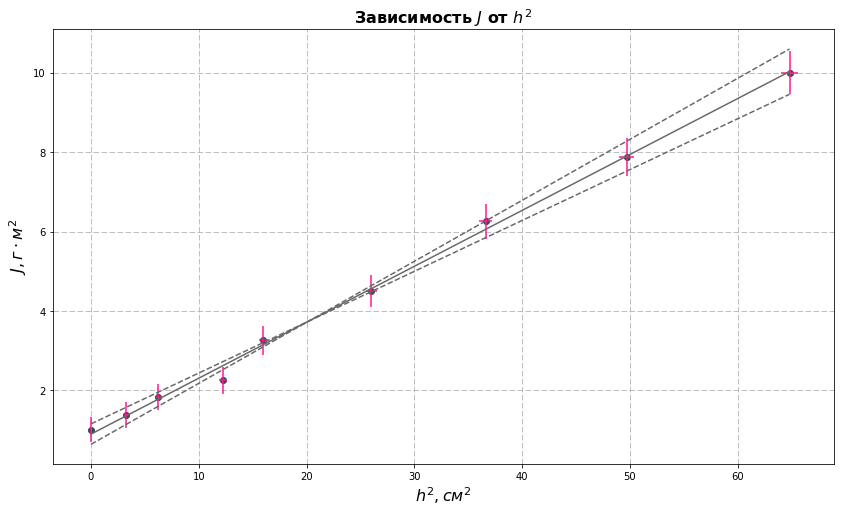

In [38]:
x = np.array(h_t_1) ** 2
y = np.array(J_t_1)
sigma_x = 2 * np.array(h_t_1) * np.array(sigma_h_t_1)
sigma_y = np.array(sigma_J_t_1)

a, b = np.polyfit(x, y, deg=1)
a_1, b_1 = np.polyfit(x, y - sigma_y * np.linspace(1, -1, len(sigma_y)), deg=1)
a_2, b_2 = np.polyfit(x, y + sigma_y * np.linspace(1, -1, len(sigma_y)), deg=1)

plt.figure(figsize=(14, 8))
plt.grid(linestyle='--')
plt.title('Зависимость $J$ от $h^2$', fontweight='bold', fontsize=16)
plt.xlabel('$h^2, см^2$', fontsize=16)
plt.ylabel('$J, г \cdot м^2$', fontsize=16)
plt.plot(x, b + x * a, color='dimgrey')
plt.plot(x, b_1 + x * a_1, color='dimgrey', ls='--')
plt.plot(x, b_2 + x * a_2, color='dimgrey', ls='--')
plt.scatter(x, y, color='darkslategrey')
plt.errorbar(x, y, xerr=sigma_x, yerr=sigma_y, ls ='none', color = 'deeppink')
plt.show()

Определим погрешности как $\sigma_m = \frac{m_\max - m_\min}{\sqrt{N_{exp}}}$, $\sigma_{J_с} = \frac{{J_с}_\max - {J_с}_\min}{\sqrt{N_{exp}}}$.

In [39]:
exp_t_1 = len(table_1)
sigma_a = (a_1 - a_2) / math.sqrt(exp_t_1)
sigma_b = (b_2 - b_1) / math.sqrt(exp_t_1)
print("m = %.0f +- %.0f г" %(a * 10000, sigma_a * 10000))
print("J_с = %.2f +- %.2f г $\cdot$ м^2" %(b, sigma_b))

m = 1408 +- 85 г
J_с = 0.90 +- 0.17 г $\cdot$ м^2


Диаметр диска $D = 8 \pm 0.1 см$; откуда его момент инерции равен (аналогично платформе) $J_с = \frac{MD^2}{8} = 1.43 кг \cdot м^2$;

$\sigma_{J_с} = \sqrt{\ferr{J_c}{M} + \ferr{J_c}{D}} = \frac{1}{8} \sqrt{D^4 \err{M} + {(2MD)}^2 \err{D}} = 0.05 г \cdot м^2$.

Таким образом, $M = 1408 \pm 85 г \approx 1416 \pm 9 г$;

$J_c = 0.9 \pm 0.2 г \cdot м^2$, что отличается от $1.43 \pm 0.05 г \cdot м^2$.

In [40]:
D = 0.09
sigma_D = 0.001

J_c = M_t_1 * D ** 2 / 8
sigma_J_c = math.sqrt((D ** 2 * sigma_M_t_1) +
                      (2 * M_t_1 * D * sigma_D) ** 2) / 8
print("J_с = %.2f +- %.2f г $\cdot$ м^2" %(J_c, sigma_J_c))

J_с = 1.43 +- 0.05 г $\cdot$ м^2


Рассмотрим брусок:

- $a = 21.00 \pm 0.05 см$ &mdash; его длина;
- $b = 2.75 \pm 0.05 см$ &mdash; его ширина;
- $c = 2.65 \pm 0.05 см$ &mdash; его высота;
- $M = 1205 \pm 1 г$ &mdash; его масса;
- $n = 30$, $t = 56.5 \pm 0.5 с$ &mdash; данные, полученные из эксперимента.

Из вычислений:

- $T = 3.77 \pm 0.03 с$ &mdash; период колебаний;
- $J = 4.0 \pm 0.4 г \cdot м^2$ &mdash; момент инерции;

In [41]:
n_b = 30
N_b = n_b / 2
t_b = 56.5
sigma_t_b = 0.5

M_b = 1205
sigma_M_b = 1

T_b = period(t_b, N_b)
sigma_T_b = period(sigma_t_b, N_b)

J_b = inertion(k, M_0 + M_b, T_b) - J_0
sigma_J_b = sigma_inertion(k, M_0 + M_b, T_b,
            sigma_k, math.sqrt(sigma_M_0 ** 2 + sigma_M_b ** 2), sigma_T_b)

print("T_b = %.2f +- %.2f" % (T_b, sigma_T_b))
print("J_b = %.2f +- %.2f" % (J_b, sigma_J_b))

T_b = 3.77 +- 0.03
J_b = 4.02 +- 0.38


Пусть мы положили параллелепипед так, что ось подвеса параллельна стороне $b$ и проходит через центр масс.

С помощью теоремы Гюйгенса-Штайнера: $J = \frac{M}{12}(a^2 + c^2) = 4.5 г \cdot м^2$;

$\sigma_J = \sqrt{\ferr{J}{M} + \ferr{J}{a} + \ferr{J}{b}} = \frac{1}{12}\sqrt{(a^2 + c^2)^2 \err{M} + (2 Ma)^2 \err{a} + (2 Mc)^2 \err{c}} = 0.3 г \cdot м^2$;

In [42]:
a_b = 0.21
b_b = 0.0275
c_b = 0.0265
sigma_side = 0.0005

J_b_o = M_b *(a_b ** 2 + c_b ** 2) /12
sigma_J_b_o = math.sqrt((sigma_M_b * (a_b ** 2 + c_b ** 2)) ** 2 +
                      (2 * M_b * sigma_side) ** 2 *(a_b ** 2 + c_b ** 2))
print("J_b = %.2f +- %.2f" % (J_b_o, sigma_J_b_o))

J_b = 4.50 +- 0.26


Тогда $J = 4.5 \pm 0.3 г \cdot м^2 \approx 4.0 + 0.3 г \cdot м^2$, т.е. в пределах погрешностей моменты инерции совпадают.